In [8]:
n_bins = 15

In [7]:
interesting_columns = [
    'costheta_X_reco',
    'costheta_L_reco',
    'chi_reco',
    'q2_reco',
    'isolation_bdt',
    'B0_M',
    'tau_life_reco',
]

# Compare $B \to D^{*-}\left(D^{+} \to K^+ \pi^+ \pi^+  \right)X$ peak in MC and data

**INPUTS**
- `MC`: $_s$Weighted $D^+ \to K^+ \pi^+ \pi^-$ peak in MC
- `data`: $_s$Weighted $D^+ \to K^+ \pi^+ \pi^-$ peak in data

**GOALS**: 
Compare $_s$Weighted `MC` and $_s$Weighted data with the weights computed with `GBReweighter`


The columns that need to be looked at are:
- $q^2$: `q2_reco`
- *isolation BDT*: `isolation_bdt`
- $m(D^*K\pi\pi)$: `m_DstKpipi`
- The angles 
    - $cos(\theta_X)$ ($=\theta_D$ in the paper): `costheta_X_reco`
    - $cos(\theta_L)$: `costheta_L_reco`
    - $\chi$: `chi_reco`

We'll also look at :
- $t_\tau$: `tau_life_reco`

In [1]:
import sys
sys.path.insert(0, '..')
from definition import (
    columns,
    data_names,
    column_ranges,
    colors
)

MC_name   = data_names['MC']
data_name = data_names['data']
reweighted_MC_name = data_names['GBReweight_MC']

print("MC name: ", MC_name)
print("data name: ", data_name)
print("reweighted MC name: ", reweighted_MC_name)


MC name:  BTODstD0X_MC
data name:  BTODstD0X
reweighted MC name:  GBReweighter_BTODstD0X_MC


In [2]:
# python libraries

# bd2dsttaunu
from bd2dsttaunu.locations import loc

# HEA library
from HEA.plot import plot_hist_auto, plot_hist, save_fig, plot_divide_auto
from HEA import load_dataframe
from HEA.plot.tools import draw_vline
from HEA.definition import latex_params
from HEA.pandas_root import load_saved_root
from HEA.tools import get_chi2_2samp
from HEA.tools.string import str_number_into_latex


Welcome to JupyROOT 6.22/06


## Read the dataframe

In [3]:
df = {}
df['MC'] = load_saved_root(reweighted_MC_name, folder_name=MC_name)
df['data'] = load_saved_root(data_name + '_with_sWeights', folder_name=data_name)

Loading /home/correiaa/bd2dsttaunu/output//root/BTODstD0X_MC/GBReweighter_BTODstD0X_MC.root
Loading /home/correiaa/bd2dsttaunu/output//root/BTODstD0X/BTODstD0X_with_sWeights.root


### Check for NaN values

In [4]:
# for column in columns:
#     print(column)
#     print('data')
#     print(df['data'][column].isnull().values.any())
#     print('MC')
#     print(df['MC'][column].isnull().values.any())
#     print("")

### Remove NaN values

In [5]:
df['data'] = df['data'].dropna()
df['MC'] = df['MC'].dropna()

## Plots

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/costheta_X_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/costheta_L_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/chi_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/q2_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/isolation_bdt
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/B0_M
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//GBReweighter_BTODstD0X_MC_vs_BTODstD0X/tau_life_reco


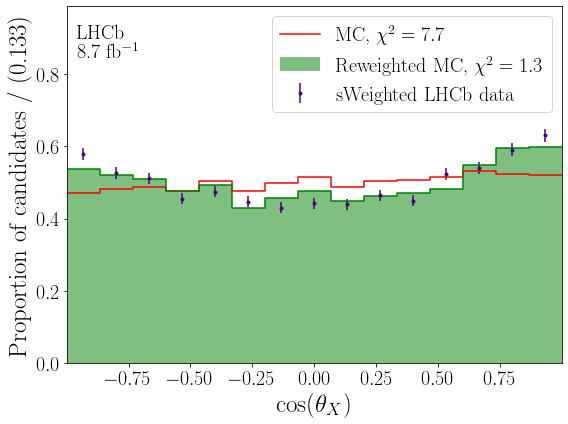

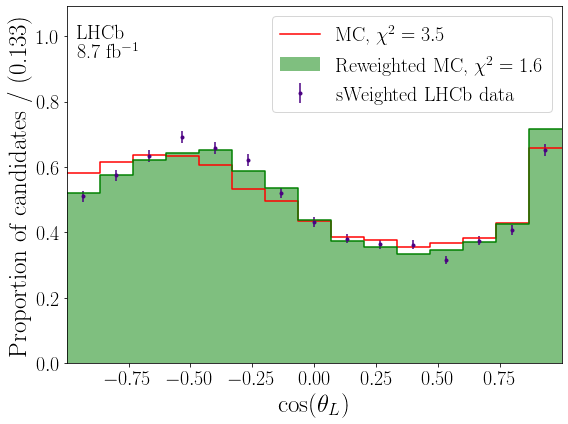

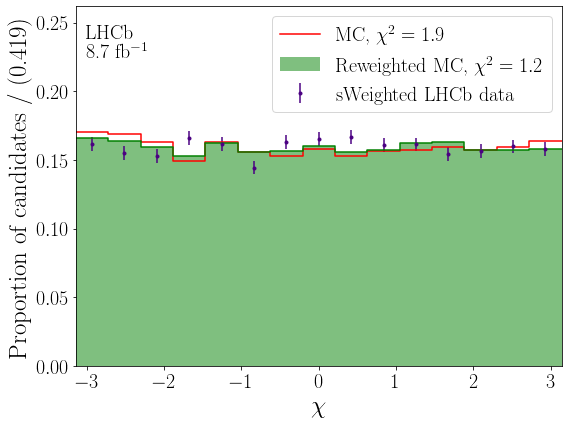

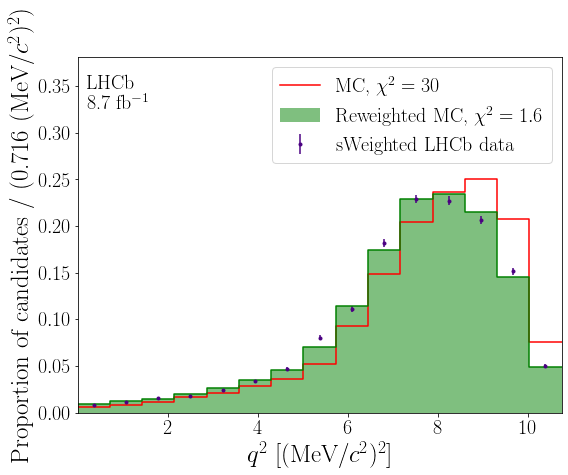

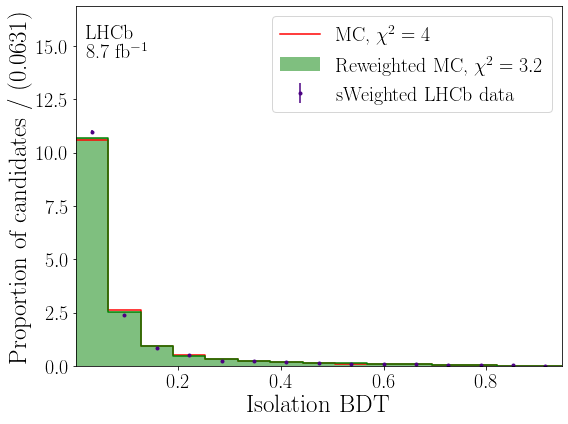

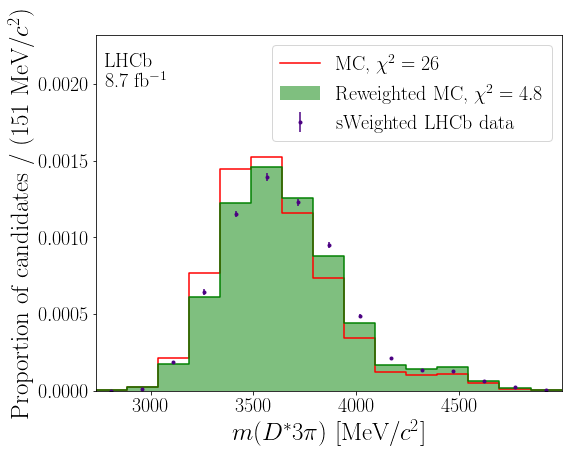

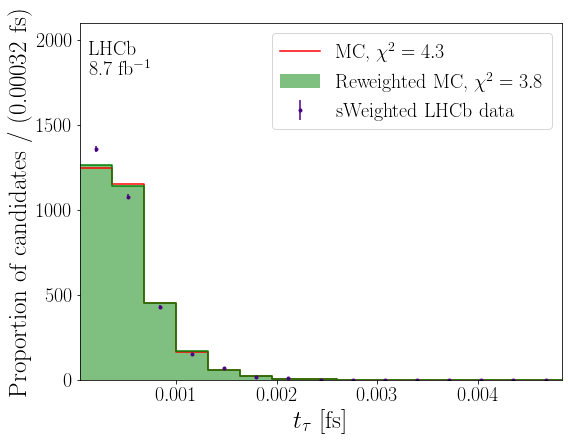

In [12]:
for column in interesting_columns:
    
    chi2_original = get_chi2_2samp(data1=df['MC'][column], 
                          data2=df['data'][column], 
                          n_bins=n_bins, 
                          weights1=df['MC']['sWeight'], 
                          weights2=df['data']['sWeight'])
        
    chi2_original = str_number_into_latex(f"{chi2_original:.2g}")
    label_original = ', $\\chi^2 = {}$'.format(chi2_original)
    
    chi2_reweighted = get_chi2_2samp(data1=df['MC'][column], 
                          data2=df['data'][column], 
                          n_bins=n_bins, 
                          weights1=df['MC']['weight'], 
                          weights2=df['data']['sWeight'])
        
    chi2_reweighted = str_number_into_latex(f"{chi2_reweighted:.2g}")
    label_reweighted = ', $\\chi^2 = {}$'.format(chi2_reweighted)
    
    fig, ax = plot_hist_auto(
        {'MC': df['MC'], 'Reweighted MC': df['MC'], 'sWeighted LHCb data':df['data']}, 
        column, fig_name=column,
        labels=[label_original, label_reweighted, None],
        folder_name=f'{reweighted_MC_name}_vs_{data_name}', 
        bar_mode=[True, True, False], 
        n_bins=n_bins,
        colors=[[None, colors['MC']],
                colors['reweighted_MC'], 
                colors['data']], 
        weights=[df['MC']['sWeight'], df['MC']['weight'], df['data']['sWeight']],
        pos_text_LHC={'ha': 'left', 'fontsize':20})

In [53]:
df['MC']['weight']

7090     0.717181
11684    0.493770
20870    1.238037
5426     0.980004
8503     1.583475
           ...   
19328    0.975366
14180    1.160361
14842    1.482829
8653     0.659403
21503    1.318651
Name: weight, Length: 25536, dtype: float64